In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
import napari
import pandas as pd
import numpy as np
from DLC_for_WBFM.utils.feature_detection.class_frame_pair import FramePair



Bad key "text.kerning_factor" on line 4 in
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
fname = "/home/charles/dlc_stacks/worm3-newseg-2021_11_17/project_config.yaml"
project_data = ProjectData.load_final_project_data_from_config(fname, to_load_tracklets=True)

Output files: /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/global2tracklet_manual.pickle, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/manually_split_tracklets.h5, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_names.pickle, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_times.pickle
Project data for directory:
/home/charles/dlc_stacks/worm3-newseg-2021_11_17 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: False
============Tracklets==================
df_training_tracklets: False
reindexed_masks_training: True
============Traces=====================
red_traces: False
green_traces: False
final_tracks: False
behavior_annotations: True



# Check the tracklets

In [3]:
df_tracklets = project_data.df_all_tracklets

In [4]:
df_tracklets

bodyparts tracklet_0000000                                                   \
coords                   z           x           y likelihood raw_neuron_id   
0                 4.877115  297.774098  424.044846   0.366408           0.0   
1                 4.495950  280.282714  407.775260   0.151632           5.0   
2                 6.018471  272.740668  406.364028   0.431153           1.0   
3                 5.427147  255.625872  396.335380   0.304492           1.0   
4                 5.120417  249.088674  407.942513   0.399028           1.0   
...                    ...         ...         ...        ...           ...   
1494                   NaN         NaN         NaN        NaN           NaN   
1495                   NaN         NaN         NaN        NaN           NaN   
1496                   NaN         NaN         NaN        NaN           NaN   
1497                   NaN         NaN         NaN        NaN           NaN   
1498                   NaN         NaN         NaN        NaN           NaN   

bodyparts                        tracklet_0000001                          \
coords    brightness_red  volume                z           x           y   
0                64019.0  1273.0         4.542084  313.311412  433.153732   
1                65805.0  1532.0         4.130645  298.316611  412.867468   
2                67242.0  1591.0         4.173412  287.559807  406.981428   
3                58790.0  1325.0         4.098089  271.716247  396.642877   
4                63006.0  1383.0         3.630491  264.485370  415.498987   
...                  ...     ...              ...         ...         ...   
1494                 NaN     NaN              NaN         NaN         NaN   
1495                 NaN     NaN              NaN         NaN         NaN   
1496                 NaN     NaN              NaN         NaN         NaN   
1497                 NaN     NaN              NaN         NaN         NaN   
1498                 NaN     NaN              NaN         NaN         NaN   

bodyparts  ... tracklet_0016591                       tracklet_0016592  \
coords     ...    raw_neuron_id brightness_red volume                z   
0          ...              NaN            NaN    NaN              NaN   
1          ...              NaN            NaN    NaN              NaN   
2          ...              NaN            NaN    NaN              NaN   
3          ...              NaN            NaN    NaN              NaN   
4          ...              NaN            NaN    NaN              NaN   
...        ...              ...            ...    ...              ...   
1494       ...            134.0         7293.0  321.0        21.953050   
1495       ...            142.0         7920.0  353.0        21.881410   
1496       ...            133.0         9718.0  423.0        22.034997   
1497       ...            142.0        14260.0  610.0        19.681274   
1498       ...            141.0        16050.0  625.0        19.062731   

bodyparts                                                                  \
coords              x           y likelihood raw_neuron_id brightness_red   
0                 NaN         NaN        NaN           NaN            NaN   
1                 NaN         NaN        NaN           NaN            NaN   
2                 NaN         NaN        NaN           NaN            NaN   
3                 NaN         NaN        NaN           NaN            NaN   
4                 NaN         NaN        NaN           NaN            NaN   
...               ...         ...        ...           ...            ...   
1494       246.370100  434.576126   0.583826         141.0        35612.0   
1495       261.815564  402.035274   0.618481         147.0        38924.0   
1496       266.053027  403.813406   0.211373         148.0        40489.0   
1497       273.951602  407.529012   0.457777          80.0        29712.0   
1498       278.125328  411.366388   0.000000          78.0        29698.0   

bodyp

In [5]:
df_fname = "/home/charles/dlc_stacks/worm3-newseg-2021_11_17/2-training_data/all_tracklets.h5"

df2 = pd.read_hdf(df_fname)

In [6]:
# df2

# Long-range matching

In [7]:
%load_ext autoreload
%autoreload 2
from DLC_for_WBFM.utils.postures.centerline_pca import WormFullVideoPosture, WormReferencePosture
from DLC_for_WBFM.utils.pipeline.tracklet_class import NeuronComposedOfTracklets, TrackedWorm, DetectedTrackletsAndNeurons
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
import numpy as np
import pandas as pd
from DLC_for_WBFM.utils.pipeline.matches_class import MatchesWithConfidence
from DLC_for_WBFM.utils.feature_detection.class_frame_pair import calc_FramePair_from_Frames
from tqdm.auto import tqdm
from DLC_for_WBFM.utils.pipeline.matches_class import get_tracklet_name_from_full_name
import importlib
from DLC_for_WBFM.utils.pipeline.matches_class import MatchesAsGraph
import DLC_for_WBFM.utils.pipeline.matches_class as matches_class

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
fname = "/home/charles/dlc_stacks/worm3-newseg-2021_11_17/project_config.yaml"

project_data = ProjectData.load_final_project_data_from_config(fname, to_load_tracklets=True, to_load_frames=True)

Output files: /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/global2tracklet_manual.pickle, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/manually_split_tracklets.h5, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_names.pickle, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_times.pickle
Project data for directory:
/home/charles/dlc_stacks/worm3-newseg-2021_11_17 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: False
============Tracklets==================
df_training_tracklets: False
reindexed_masks_training: True
============Traces=====================
red_traces: False
green_traces: False
final_tracks: False
behavior_annotations: True



In [9]:
df_tracklets = project_data.df_all_tracklets
num_frames = project_data.num_frames
all_frames = project_data.raw_frames
all_matches = project_data.raw_matches
raw_clust = project_data.raw_clust

frame_pair_options = all_matches[(0,1)].options

In [10]:
fname = "/project/neurobiology/zimmer/wbfm/centerline/wbfm_ulises_centerline_for_charlie/2021-03-04_16-17-30_worm3_ZIM2051-_spline_K.csv"

full_posture = WormFullVideoPosture(fname)
reference_posture = WormReferencePosture(0, full_posture)

In [11]:

all_long_range_matches = {}
anchor_ind = 0
anchor_frame = all_frames[anchor_ind]
verbose = 2

In [12]:
# Initialize TrackedNeurons at 0, and initialize the TrackedWorm
# Get all tracklets that start at t=0
all_tracklet_names = df_tracklets.columns.get_level_values(0).drop_duplicates()

detections = DetectedTrackletsAndNeurons(df_tracklets, 
                                         project_data.segmentation_metadata,
                                         df_tracklet_matches=raw_clust)
worm_obj = TrackedWorm(detections=detections, verbose=1)

for i, name in enumerate(all_tracklet_names):
    tracklet = df_tracklets[[name]]
    # Assume tracklets are ordered, such that the first tracklet which starts at t>0 mean all the rest do
    if np.isnan(tracklet[name]['z'].iloc[0]):
        break
    new_neuron = worm_obj.initialize_new_neuron()
    new_neuron.add_tracklet(i, 1.0, tracklet, metadata=f"Initial tracklet")

  0%|          | 0/16624 [00:00<?, ?it/s]

In [13]:
# Loop over times, and if any TrackedNeuron's have a gap, use the WormReferencePosture to attempt a long-distance match
# Loop over similar postures, not all times
indices_to_check = reference_posture.indices_close_to_reference[1:]
indices_to_check = [i for i in indices_to_check if i < project_data.num_frames]
for i_next_similar_posture in tqdm(indices_to_check):
    
    tracks_with_gap = worm_obj.tracks_with_gap_at_or_after_time(i_next_similar_posture)
    if not tracks_with_gap:
        continue
    
    # Then do one volume-volume match to try and continue all ended tracklets
    # i_next_similar_posture = reference_posture.get_next_close_index(t)
    pair_indices = (anchor_ind, i_next_similar_posture)
    long_range_pair = all_long_range_matches.get(pair_indices, None)
    if long_range_pair is None:
        long_range_frame = all_frames[i_next_similar_posture]
        if verbose >= 2:
            print(f"Calculating matches for pair: {pair_indices}")
        long_range_pair = calc_FramePair_from_Frames(frame0=anchor_frame, frame1=long_range_frame, frame_pair_options=frame_pair_options)

        all_long_range_matches[pair_indices] = long_range_pair
    else:
        if verbose >= 3:
            print(f"Reusing matches for pair: {pair_indices}")
    
    # Build convinience class
    long_range_pair.calc_final_matches()
    long_range_matches = MatchesWithConfidence.matches_from_array(np.array(long_range_pair.final_matches))
    mapping_to_long_range = long_range_matches.get_mapping_0_to_1()
    mapping_to_confidence = long_range_matches.get_mapping_pair_to_conf()
    
    tracks_that_are_filled = 0
    for track_name, track in tracks_with_gap.items():
        
        # From the starting neuron, get the long-range match
        i_starting_neuron = track.neuron_ind
        i_matched_neuron = mapping_to_long_range.get(i_starting_neuron, None)
        if i_matched_neuron is None:
            continue
        conf = mapping_to_confidence[(i_starting_neuron, i_matched_neuron)]
        
        # From the long-range match (including frame information), get the tracklet
        # For now, just accept it
        matched_tracklet_ind, matched_tracklet_name = detections.get_tracklet_from_neuron_and_time(i_matched_neuron, i_next_similar_posture)
        if matched_tracklet_name is None:
            # i.e. there was a neuron match, but it doesn't belong to any tracklet
            continue
        matched_tracklet_df = worm_obj.detections.df_tracklets_zxy[[matched_tracklet_name]]
        track.add_tracklet(matched_tracklet_ind, 
                           confidence=conf, 
                           tracklet=matched_tracklet_df, 
                           metadata=f"Match due to pair {pair_indices}; original name {matched_tracklet_name}")
        
        # TODO: Also record if the matched neurons match the tracklets that didn't end
        tracks_that_are_filled += 1
        
    if verbose >= 2:
        print(f"At time {i_next_similar_posture}, extended {tracks_that_are_filled}/{len(tracks_with_gap)} tracks")
    
    # break
    # if i_next_similar_posture > 50:
    #     break

  0%|          | 0/197 [00:00<?, ?it/s]

Calculating matches for pair: (0, 16)


  0%|          | 0/32 [00:00<?, ?it/s]

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
At time 16, extended 41/49 tracks
Calculating matches for pair: (0, 17)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 17, extended 8/13 tracks
Calculating matches for pair: (0, 18)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 18, extended 7/13 tracks
Calculating matches for pair: (0, 19)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 19, extended 3/8 tracks
Calculating matches for pair: (0, 39)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 39, extended 40/82 tracks
Calculating matches for pair: (0, 40)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 40, extended 19/43 tracks
Calculating matches for pair: (0, 41)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 41, extended 5/28 tracks
Calculating matches for pair: (0, 72)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 72, extended 50/85 tracks
Calculating matches for pair: (0, 73)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 73, extended 10/35 tracks
Calculating matches for pair: (0, 74)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 74, extended 4/26 tracks
Calculating matches for pair: (0, 84)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 84, extended 20/46 tracks
Calculating matches for pair: (0, 85)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 85, extended 8/29 tracks
Calculating matches for pair: (0, 101)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 101, extended 33/63 tracks
Calculating matches for pair: (0, 102)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 102, extended 9/34 tracks
Calculating matches for pair: (0, 182)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 182, extended 55/105 tracks
Calculating matches for pair: (0, 183)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 183, extended 12/50 tracks
Calculating matches for pair: (0, 184)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 184, extended 17/38 tracks
Calculating matches for pair: (0, 185)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 185, extended 8/28 tracks
Calculating matches for pair: (0, 201)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 201, extended 30/66 tracks
Calculating matches for pair: (0, 202)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 202, extended 13/40 tracks
Calculating matches for pair: (0, 203)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 203, extended 9/31 tracks
Calculating matches for pair: (0, 217)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 217, extended 32/55 tracks
Calculating matches for pair: (0, 218)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 218, extended 3/24 tracks
Calculating matches for pair: (0, 219)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 219, extended 5/27 tracks
Calculating matches for pair: (0, 220)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 220, extended 14/28 tracks
Calculating matches for pair: (0, 236)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 236, extended 20/56 tracks
Calculating matches for pair: (0, 237)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 237, extended 13/39 tracks
Calculating matches for pair: (0, 238)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 238, extended 10/26 tracks
Calculating matches for pair: (0, 252)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 252, extended 27/50 tracks
Calculating matches for pair: (0, 253)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 253, extended 12/27 tracks
Calculating matches for pair: (0, 254)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 254, extended 10/17 tracks
Calculating matches for pair: (0, 255)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 255, extended 4/11 tracks
Calculating matches for pair: (0, 256)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 256, extended 5/10 tracks
Calculating matches for pair: (0, 273)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 273, extended 26/55 tracks
Calculating matches for pair: (0, 288)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 288, extended 33/61 tracks
Calculating matches for pair: (0, 289)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 289, extended 15/30 tracks
Calculating matches for pair: (0, 290)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 290, extended 3/18 tracks
Calculating matches for pair: (0, 291)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 291, extended 4/18 tracks
Calculating matches for pair: (0, 292)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 292, extended 2/16 tracks
Calculating matches for pair: (0, 322)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 322, extended 37/75 tracks
Calculating matches for pair: (0, 323)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 323, extended 18/38 tracks
Calculating matches for pair: (0, 324)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 324, extended 11/21 tracks
Calculating matches for pair: (0, 325)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 325, extended 6/16 tracks
Calculating matches for pair: (0, 338)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 338, extended 22/49 tracks
Calculating matches for pair: (0, 339)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 339, extended 7/29 tracks
Calculating matches for pair: (0, 372)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 372, extended 33/66 tracks
Calculating matches for pair: (0, 373)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 373, extended 12/33 tracks
Calculating matches for pair: (0, 386)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 386, extended 24/56 tracks
Calculating matches for pair: (0, 387)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 387, extended 13/33 tracks
Calculating matches for pair: (0, 388)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 388, extended 10/24 tracks
Calculating matches for pair: (0, 389)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 389, extended 4/18 tracks
Calculating matches for pair: (0, 402)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 402, extended 12/46 tracks
Calculating matches for pair: (0, 403)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 403, extended 17/39 tracks
Calculating matches for pair: (0, 404)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 404, extended 4/22 tracks
Calculating matches for pair: (0, 405)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 405, extended 5/19 tracks
Calculating matches for pair: (0, 423)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 423, extended 43/58 tracks
Calculating matches for pair: (0, 424)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 424, extended 3/15 tracks
Calculating matches for pair: (0, 425)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 425, extended 2/15 tracks
Calculating matches for pair: (0, 438)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 438, extended 20/55 tracks
Calculating matches for pair: (0, 439)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 439, extended 14/37 tracks
Calculating matches for pair: (0, 440)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 440, extended 6/25 tracks
Calculating matches for pair: (0, 441)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 441, extended 5/22 tracks
Calculating matches for pair: (0, 472)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 472, extended 50/75 tracks
Calculating matches for pair: (0, 473)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 473, extended 6/25 tracks
Calculating matches for pair: (0, 474)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 474, extended 8/22 tracks
Calculating matches for pair: (0, 487)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 487, extended 28/50 tracks
Calculating matches for pair: (0, 488)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 488, extended 11/24 tracks
Calculating matches for pair: (0, 489)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 489, extended 5/17 tracks
Calculating matches for pair: (0, 504)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 504, extended 18/51 tracks
Calculating matches for pair: (0, 505)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 505, extended 7/33 tracks
Calculating matches for pair: (0, 522)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 522, extended 33/60 tracks
Calculating matches for pair: (0, 523)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 523, extended 14/32 tracks
Calculating matches for pair: (0, 524)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 524, extended 2/25 tracks
Calculating matches for pair: (0, 561)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 561, extended 41/79 tracks
Calculating matches for pair: (0, 562)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 562, extended 19/39 tracks
Calculating matches for pair: (0, 563)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 563, extended 10/21 tracks
Calculating matches for pair: (0, 582)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 582, extended 51/67 tracks
Calculating matches for pair: (0, 583)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 583, extended 6/17 tracks
Calculating matches for pair: (0, 584)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 584, extended 6/13 tracks
Calculating matches for pair: (0, 618)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 618, extended 43/93 tracks
Calculating matches for pair: (0, 619)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 619, extended 21/52 tracks
Calculating matches for pair: (0, 632)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 632, extended 23/59 tracks
Calculating matches for pair: (0, 633)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 633, extended 18/37 tracks
Calculating matches for pair: (0, 651)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 651, extended 27/60 tracks
Calculating matches for pair: (0, 667)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 667, extended 24/52 tracks
Calculating matches for pair: (0, 668)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 668, extended 5/28 tracks
Calculating matches for pair: (0, 683)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 683, extended 24/47 tracks
Calculating matches for pair: (0, 684)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 684, extended 10/23 tracks
Calculating matches for pair: (0, 685)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 685, extended 4/17 tracks
Calculating matches for pair: (0, 698)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 698, extended 26/48 tracks
Calculating matches for pair: (0, 699)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 699, extended 9/25 tracks
Calculating matches for pair: (0, 700)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 700, extended 5/16 tracks
Calculating matches for pair: (0, 712)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 712, extended 22/49 tracks
Calculating matches for pair: (0, 713)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 713, extended 5/28 tracks
Calculating matches for pair: (0, 714)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 714, extended 10/24 tracks
Calculating matches for pair: (0, 727)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 727, extended 30/57 tracks
Calculating matches for pair: (0, 728)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 728, extended 10/29 tracks
Calculating matches for pair: (0, 729)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 729, extended 4/19 tracks
Calculating matches for pair: (0, 750)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 750, extended 25/63 tracks
Calculating matches for pair: (0, 751)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 751, extended 8/38 tracks
Calculating matches for pair: (0, 752)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 752, extended 6/31 tracks
Calculating matches for pair: (0, 769)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 769, extended 37/82 tracks
Calculating matches for pair: (0, 770)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 770, extended 19/45 tracks
Calculating matches for pair: (0, 771)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 771, extended 16/37 tracks
Calculating matches for pair: (0, 795)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 795, extended 33/75 tracks
Calculating matches for pair: (0, 796)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 796, extended 17/42 tracks
Calculating matches for pair: (0, 819)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 819, extended 71/100 tracks
Calculating matches for pair: (0, 836)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 836, extended 34/81 tracks
Calculating matches for pair: (0, 837)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 837, extended 8/48 tracks
Calculating matches for pair: (0, 870)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 870, extended 31/83 tracks
Calculating matches for pair: (0, 871)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 871, extended 22/52 tracks
Calculating matches for pair: (0, 872)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 872, extended 8/30 tracks
Calculating matches for pair: (0, 888)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 888, extended 25/55 tracks
Calculating matches for pair: (0, 889)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 889, extended 7/32 tracks
Calculating matches for pair: (0, 890)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 890, extended 3/25 tracks
Calculating matches for pair: (0, 904)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 904, extended 32/55 tracks
Calculating matches for pair: (0, 905)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 905, extended 4/23 tracks
Calculating matches for pair: (0, 906)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 906, extended 3/19 tracks
Calculating matches for pair: (0, 907)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 907, extended 5/18 tracks
Calculating matches for pair: (0, 922)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 922, extended 26/56 tracks
Calculating matches for pair: (0, 923)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 923, extended 10/32 tracks
Calculating matches for pair: (0, 938)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 938, extended 26/54 tracks
Calculating matches for pair: (0, 939)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 939, extended 9/29 tracks
Calculating matches for pair: (0, 955)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 955, extended 28/58 tracks
Calculating matches for pair: (0, 956)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 956, extended 9/30 tracks
Calculating matches for pair: (0, 957)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 957, extended 6/24 tracks
Calculating matches for pair: (0, 958)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 958, extended 5/20 tracks
Calculating matches for pair: (0, 972)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 972, extended 30/51 tracks
Calculating matches for pair: (0, 973)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 973, extended 7/22 tracks
Calculating matches for pair: (0, 974)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 974, extended 2/19 tracks
Calculating matches for pair: (0, 987)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 987, extended 28/57 tracks
Calculating matches for pair: (0, 988)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 988, extended 8/29 tracks
Calculating matches for pair: (0, 989)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 989, extended 5/27 tracks
Calculating matches for pair: (0, 1008)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1008, extended 30/57 tracks
Calculating matches for pair: (0, 1009)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1009, extended 10/32 tracks
Calculating matches for pair: (0, 1010)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1010, extended 7/27 tracks
Calculating matches for pair: (0, 1011)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1011, extended 6/20 tracks
Calculating matches for pair: (0, 1027)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1027, extended 25/55 tracks
Calculating matches for pair: (0, 1028)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1028, extended 10/37 tracks
Calculating matches for pair: (0, 1043)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1043, extended 41/68 tracks
Calculating matches for pair: (0, 1044)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1044, extended 10/30 tracks
Calculating matches for pair: (0, 1045)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1045, extended 8/23 tracks
Calculating matches for pair: (0, 1072)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1072, extended 31/86 tracks
Calculating matches for pair: (0, 1073)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1073, extended 29/58 tracks
Calculating matches for pair: (0, 1092)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1092, extended 41/75 tracks
Calculating matches for pair: (0, 1093)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1093, extended 10/35 tracks
Calculating matches for pair: (0, 1094)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1094, extended 9/33 tracks
Calculating matches for pair: (0, 1119)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1119, extended 41/83 tracks
Calculating matches for pair: (0, 1120)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1120, extended 18/45 tracks
Calculating matches for pair: (0, 1175)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1175, extended 101/118 tracks
Calculating matches for pair: (0, 1176)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1176, extended 6/17 tracks
Calculating matches for pair: (0, 1177)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1177, extended 6/18 tracks
Calculating matches for pair: (0, 1196)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1196, extended 47/56 tracks
Calculating matches for pair: (0, 1197)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1197, extended 10/17 tracks
Calculating matches for pair: (0, 1198)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1198, extended 5/14 tracks
Calculating matches for pair: (0, 1213)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1213, extended 19/52 tracks
Calculating matches for pair: (0, 1214)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1214, extended 25/41 tracks
Calculating matches for pair: (0, 1215)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1215, extended 11/22 tracks
Calculating matches for pair: (0, 1216)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1216, extended 3/14 tracks
Calculating matches for pair: (0, 1250)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1250, extended 69/80 tracks
Calculating matches for pair: (0, 1251)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1251, extended 7/12 tracks
Calculating matches for pair: (0, 1252)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1252, extended 3/8 tracks
Calculating matches for pair: (0, 1268)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1268, extended 29/59 tracks
Calculating matches for pair: (0, 1269)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1269, extended 9/31 tracks
Calculating matches for pair: (0, 1285)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1285, extended 11/53 tracks
Calculating matches for pair: (0, 1286)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1286, extended 14/43 tracks
Calculating matches for pair: (0, 1300)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1300, extended 25/54 tracks
Calculating matches for pair: (0, 1301)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1301, extended 7/30 tracks
Calculating matches for pair: (0, 1302)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1302, extended 1/24 tracks
Calculating matches for pair: (0, 1303)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1303, extended 4/25 tracks
Calculating matches for pair: (0, 1316)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1316, extended 24/51 tracks
Calculating matches for pair: (0, 1317)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1317, extended 8/29 tracks
Calculating matches for pair: (0, 1318)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1318, extended 3/26 tracks
Calculating matches for pair: (0, 1319)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1319, extended 4/24 tracks
Calculating matches for pair: (0, 1336)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1336, extended 18/62 tracks
Calculating matches for pair: (0, 1350)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1350, extended 20/64 tracks
Calculating matches for pair: (0, 1351)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1351, extended 17/44 tracks
Calculating matches for pair: (0, 1352)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1352, extended 6/30 tracks
Calculating matches for pair: (0, 1367)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1367, extended 29/67 tracks
Calculating matches for pair: (0, 1368)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1368, extended 8/39 tracks
Calculating matches for pair: (0, 1369)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1369, extended 9/32 tracks
Calculating matches for pair: (0, 1384)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1384, extended 17/63 tracks
Calculating matches for pair: (0, 1385)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1385, extended 25/50 tracks
Calculating matches for pair: (0, 1386)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1386, extended 10/30 tracks
Calculating matches for pair: (0, 1400)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1400, extended 18/54 tracks
Calculating matches for pair: (0, 1401)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1401, extended 11/45 tracks
Calculating matches for pair: (0, 1402)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1402, extended 16/40 tracks
Calculating matches for pair: (0, 1403)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1403, extended 8/26 tracks
Calculating matches for pair: (0, 1420)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1420, extended 36/64 tracks
Calculating matches for pair: (0, 1421)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1421, extended 9/30 tracks
Calculating matches for pair: (0, 1452)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1452, extended 30/86 tracks
Calculating matches for pair: (0, 1453)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1453, extended 37/60 tracks
Calculating matches for pair: (0, 1454)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1454, extended 19/25 tracks
Calculating matches for pair: (0, 1474)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1474, extended 59/83 tracks
Calculating matches for pair: (0, 1475)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1475, extended 9/27 tracks
Calculating matches for pair: (0, 1476)


  0%|          | 0/32 [00:00<?, ?it/s]

At time 1476, extended 10/32 tracks


In [14]:
worm_obj.global_name_to_neuron['neuron_015'].neuron2tracklets.edges

EdgeView([('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0000014'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0000210'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0000429'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0000585'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0000758'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0001935'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0000022'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0002628'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0003442'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0003545'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tracklet_0003410'), ('bipartite_0_frame_0_neuron_015', 'bipartite_1_trackletGroup_1_tr

In [15]:
name = 'neuron_053'
worm_obj.global_name_to_neuron[name].neuron2tracklets.edges(data=True)

EdgeDataView([('bipartite_0_frame_0_neuron_053', 'bipartite_1_trackletGroup_1_tracklet_0000052', {'metadata': 'Initial tracklet', 'weight': 1.0}), ('bipartite_0_frame_0_neuron_053', 'bipartite_1_trackletGroup_1_tracklet_0000038', {'metadata': 'Match due to pair (0, 16); original name tracklet_0000042', 'weight': 0.7020618827980522}), ('bipartite_0_frame_0_neuron_053', 'bipartite_1_trackletGroup_1_tracklet_0000580', {'metadata': 'Match due to pair (0, 72); original name tracklet_0000997', 'weight': 0.4707641620933111}), ('bipartite_0_frame_0_neuron_053', 'bipartite_1_trackletGroup_1_tracklet_0000466', {'metadata': 'Match due to pair (0, 84); original name tracklet_0000748', 'weight': 0.7684992319577891}), ('bipartite_0_frame_0_neuron_053', 'bipartite_1_trackletGroup_1_tracklet_0002851', {'metadata': 'Match due to pair (0, 386); original name tracklet_0004526', 'weight': 0.6980476886726302}), ('bipartite_0_frame_0_neuron_053', 'bipartite_1_trackletGroup_1_tracklet_0002666', {'metadata': 

In [16]:
# worm_obj.global_name_to_neuron[name].tracklet_covering_ind

# Build a full graph and do bipartite B-matching (many to one) between global neurons and tracklets

In [17]:
import networkx as nx
from networkx.algorithms import bipartite
from collections import defaultdict

In [18]:
global_tracklet_neuron_graph = nx.compose_all([g.neuron2tracklets for g in worm_obj.global_name_to_neuron.values()])

In [19]:
# Copy the neuron nodes so that this becomes a normal bipartite matching problem, i.e. one-to-one, not many-to-one
neuron_nodes = {n for n, d in global_tracklet_neuron_graph.nodes(data=True) if d["bipartite"] == 0}
tracklet_nodes = {n for n, d in global_tracklet_neuron_graph.nodes(data=True) if d["bipartite"] == 1}
global_tracklet_neuron_graph_with_copies = nx.Graph(global_tracklet_neuron_graph.subgraph(tracklet_nodes))

new_name_to_original_name = dict()

for n in neuron_nodes:
    original_edges = list(global_tracklet_neuron_graph.edges(n, data=True))
    
    for i_copy in range(len(original_edges)):
        # num_copies_already_added = len(original_neuron_to_copy_mapping[n])
        new_name = f"{n}_copy{i_copy}"
        new_name_to_original_name[new_name] = n

        # Add a copy of the node for each edge, which has all the original edges
        new_edges = [[new_name, e[1], e[2]] for e in original_edges]

        global_tracklet_neuron_graph_with_copies.add_edges_from(new_edges)
        # break

In [20]:
# Do normal bipartite matching, such that each tracklet gets a match
tracklet_nodes = {n for n, d in global_tracklet_neuron_graph.nodes(data=True) if d["bipartite"] == 1}
matching_with_copies = nx.bipartite.maximum_matching(global_tracklet_neuron_graph_with_copies, top_nodes=tracklet_nodes)

In [22]:
# Collapse the added copies back to the original neuron, to get a many-to-one matching
final_matching = MatchesWithConfidence()
for name0, name1 in matching_with_copies.items():
    if 'neuron' in name0:
        neuron_copy_name = name0
        tracklet_raw_name = name1
    else:
        tracklet_raw_name = name0
        neuron_copy_name = name1
        
    # Get the names as they are in the graph above
    neuron_raw_name = new_name_to_original_name[neuron_copy_name]
    weight = global_tracklet_neuron_graph[neuron_raw_name][tracklet_raw_name]['weight']
    
    # TODO
    # tracklet_metadata = global_tracklet_neuron_graph[tracklet_raw_name][neuron_raw_name]['metadata']
    
    # Get the final names, as they are in the previous dataframes
    # tracklet_name = get_tracklet_name_from_metadata(tracklet_metadata)
    # neuron_name = get_neuron_name_from_graph_name(neuron_raw_name)
    tracklet_name = global_tracklet_neuron_graph.nodes[tracklet_raw_name]['metadata']
    neuron_name = global_tracklet_neuron_graph.nodes[neuron_raw_name]['metadata']
    
    new_match = [neuron_name, tracklet_name, weight]
    
    final_matching.add_match(new_match)
    

In [23]:
# Finally, make the full dataframe 

# Initialize using the index and column structure of the tracklets
# TODO: Add a column for tracklet ID
num_neurons = final_matching.get_num_matches()
tmp_names = all_tracklet_names[:num_neurons]
df_new = df_tracklets.loc[:, tmp_names].copy()

neuron_names = list(set(final_matching.indices0))
neuron_names.sort()
name_mapper = {t:n for t, n in zip(tmp_names, neuron_names)}
df_new.rename(columns=name_mapper, inplace=True)
df_new[:] = np.nan

max_t = len(df_tracklets)
id_vector = np.zeros(max_t)
# Actually join
for tracklet_name, neuron_name in tqdm(final_matching.get_mapping_1_to_0().items()):
    this_tracklet = df_tracklets[tracklet_name]
    # Preprocess the tracklet dataframe to have an additional column: the id of the tracklet

    nonzero_ind = this_tracklet['z'].notnull()
    tracklet_id = int(tracklet_name.split('_')[-1])
    
    df_new[neuron_name] = df_new[neuron_name].combine_first(this_tracklet)
    try:
        df_new.loc[nonzero_ind, (neuron_name, 'raw_tracklet_id')] = tracklet_id
    except KeyError:
        id_vector[:] = np.nan
        id_vector[nonzero_ind] = tracklet_id
        df_new[neuron_name, 'raw_tracklet_id'] = id_vector
    

  0%|          | 0/3031 [00:00<?, ?it/s]

# Now, save

In [38]:
track_config = project_data.project_config.get_tracking_config()

output_df_fname = track_config.config['final_3d_postprocessing']['output_df_fname']
track_config.h5_in_local_project(df_new, output_df_fname, also_save_csv=True)

# Scratch

In [ ]:
# # Hacky way to get original tracklet name from metadata...

# def get_tracklet_name_from_metadata(mdat_str):
#     import re

#     regex = r"(?:original name (\w+))"
#     matches = re.finditer(regex, mdat_str, re.MULTILINE)

#     for matchNum, match in enumerate(matches, start=1):

#         # print ("Match {matchNum} was found at {start}-{end}: {match}".format(matchNum = matchNum, start = match.start(), end = match.end(), match = match.group()))

#         for groupNum in range(0, len(match.groups())):
#             groupNum = groupNum + 1

#             # print ("Group {groupNum} found at {start}-{end}: {group}".format(groupNum = groupNum, start = match.start(groupNum), end = match.end(groupNum), group = match.group(groupNum)))
#     return match.group(groupNum)

# def get_neuron_name_from_graph_name(neuron_name):
#     return '_'.join(neuron_raw_name.split('_')[-2:])

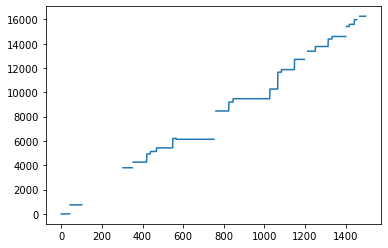

In [24]:
df_new['neuron_005', 'raw_tracklet_id'].plot()

In [25]:
np.isnan(pd.Series(id_vector))

0       False
1       False
2       False
3       False
4       False
        ...  
1494    False
1495    False
1496    False
1497    False
1498    False
Length: 1499, dtype: bool

In [26]:
df_new.loc[nonzero_ind, (neuron_name, 'raw_tracklet_id')]

762    8492.0
763    8492.0
764    8492.0
765    8492.0
766    8492.0
767    8492.0
768    8492.0
769    8492.0
770    8492.0
771    8492.0
772    8492.0
773    8492.0
774    8492.0
775    8492.0
776    8492.0
777    8492.0
Name: (neuron_092, raw_tracklet_id), dtype: float64

In [27]:
max_t = len(df_tracklets)
id_vector = np.zeros(max_t)
id_vector[:] = np.nan
nonzero_ind = df_tracklets['tracklet_0000001']['z'].notnull()
id_vector[nonzero_ind] = 1

df_tracklets['tracklet_0000001', 'raw_tracklet_id'] = id_vector
df_tracklets['tracklet_0000001', 'raw_tracklet_id']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1494    NaN
1495    NaN
1496    NaN
1497    NaN
1498    NaN
Name: (tracklet_0000001, raw_tracklet_id), Length: 1499, dtype: float64

In [28]:
nonzero_ind

0        True
1        True
2        True
3        True
4        True
        ...  
1494    False
1495    False
1496    False
1497    False
1498    False
Name: z, Length: 1499, dtype: bool

In [29]:
df_tracklets[]

SyntaxError: invalid syntax (4077487068.py, line 1)

In [ ]:
matches = re.finditer(regex, mdat, re.MULTILINE)

list(matches)

In [ ]:
mdat = global_tracklet_neuron_graph[neuron_raw_name][tracklet_name]['metadata']